## 네이버 스포츠 뉴스 워드 클라우드


* 복습 3.24일 기준 최신
- sports.txt가 안올라오면 직접 업로드




In [1]:
# KoNLPy 설치 KoNLPy 설치
!pip install konlpy

In [2]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
from konlpy.tag import Okt

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
%matplotlib inline

In [4]:
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

nanum_font number: 10


In [5]:
plt.rc('font', family='NanumBarunGothic')

### 워드 클라우드

In [7]:
with open('sports.txt') as fp:
    text = fp.read()

In [8]:
okt = Okt()
tokens = okt.nouns(text)

In [9]:
# 한글 전처리 과정에서 영문자와 숫자를 배제하고 싶으면
import re

new_text = []
for token in tokens:
    text = re.sub('[a-zA-Z0-9]', '', token)   # a-z까지, 0-9까지, ''없애는것, token에서
    new_text.append(token)    # 위 결과를 new_text에 저장

In [19]:
# Stopword를 배제하고 싶으면
# 예제 내용 : stopwords = ['오피셜','감독','선수','리그','경기']

#stopwords =  ['제외단어1','제외단어2','제외단어3','제외단어4']
#new_text = [word for word in new_text if word not in stopwords]

In [43]:
# Stopword를 배제하고 싶으면
# new_text ==> tokens 로 바꾸면 영어도 나옴
# 보통 명사화 된 것들 stopword를 통해 배제해버리기

stopwords =  ['레알','언론','선수','감독','선발', '신시내티', '공식', '발표', '대회', '팀','전','것','팬','모습','경기']
new_text = [word for word in tokens if word not in stopwords]

In [44]:
# Wordcloud를 NLTK Text로 만들어줄 때
# NLTK의 Text 활용하기
import nltk

han_text = nltk.Text(new_text, name='스포츠 뉴스')

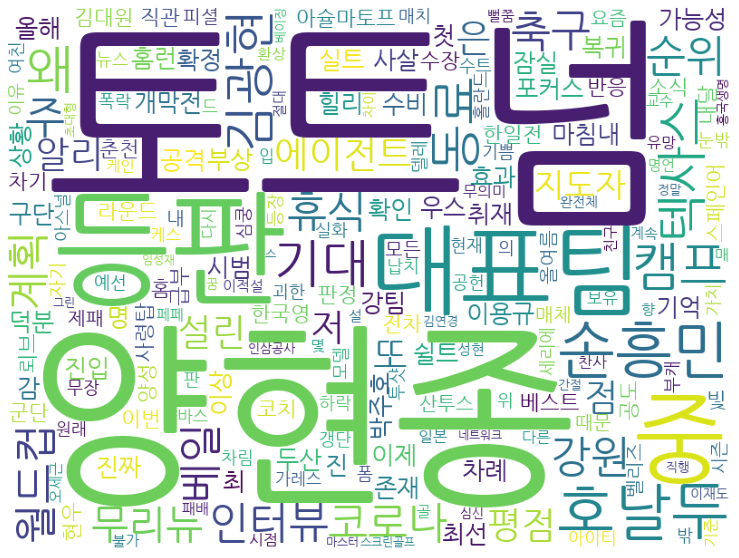

In [45]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(width = 800, height = 600, background_color="white", font_path=font_path)
plt.figure(figsize=(15,10))   #기본값 15,10
plt.imshow(wc.generate_from_frequencies(han_text.vocab()))
plt.axis("off")
plt.show()